In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv('../data/superstore.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape


(9800, 18)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [8]:
df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

In [9]:
df.isnull().sum()


row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64

In [10]:
df.drop(columns=['postal_code'], inplace=True)


In [11]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales'],
      dtype='object')

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'])


ValueError: time data "15/04/2018" doesn't match format "%m/%d/%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [13]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)


In [14]:
df['order_date'].isnull().sum()


np.int64(0)

In [15]:
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year

In [16]:
df[['order_date', 'month', 'year']].head()


,order_date,month,year
0,2017-11-08,11,2017
1,2017-11-08,11,2017
2,2017-06-12,6,2017
3,2016-10-11,10,2016
4,2016-10-11,10,2016


In [17]:
df.duplicated().sum()


np.int64(0)

## Q1: Total Sales per Year

This analysis shows how total sales are distributed across different years.
It helps identify overall growth or decline in business performance over time.

In [18]:
df.groupby('year')['sales'].sum()


year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: sales, dtype: float64

## Q2: Top 5 Best-Selling Products

This analysis identifies the top 5 products based on total sales revenue.
It helps the business understand which products contribute the most to revenue.


In [19]:
df.groupby('product_name')['sales'].sum() \
  .sort_values(ascending=False) \
  .head()


product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: sales, dtype: float64

## Q3: Sales by Region

This analysis compares total sales across different regions.
It helps identify strong and weak geographic markets.


In [20]:
df.groupby('region')['sales'].sum()


region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: sales, dtype: float64

## Q4: Monthly Sales Trend

This analysis examines sales trends over time by grouping data by year and month.
It is useful for identifying seasonality and demand patterns.


In [21]:
df.groupby(['year', 'month'])['sales'].sum()


year  month
2015  1         14205.7070
      2          4519.8920
      3         55205.7970
      4         27906.8550
      5         23644.3030
      6         34322.9356
      7         33781.5430
      8         27117.5365
      9         81623.5268
      10        31453.3930
      11        77907.6607
      12        68167.0585
2016  1         18066.9576
      2         11951.4110
      3         32339.3184
      4         34154.4685
      5         29959.5305
      6         23599.3740
      7         28608.2590
      8         36818.3422
      9         63133.6060
      10        31011.7375
      11        75249.3995
      12        74543.6012
2017  1         18542.4910
      2         22978.8150
      3         51165.0590
      4         38679.7670
      5         56656.9080
      6         39724.4860
      7         38320.7830
      8         30542.2003
      9         69193.3909
      10        59583.0330
      11        79066.4958
      12        95739.1210
2018  1         

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


## Sales by Region

This bar chart visualizes total sales across different regions, helping compare regional performance and identify the strongest markets.


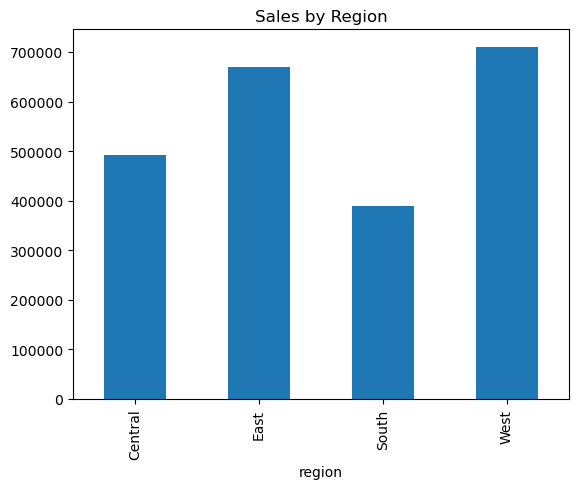

In [23]:
df.groupby('region')['sales'].sum().plot(kind='bar')
plt.title('Sales by Region')
plt.show()


## Monthly Sales Trend

This line chart shows how sales vary across months, helping identify seasonal patterns and demand fluctuations.


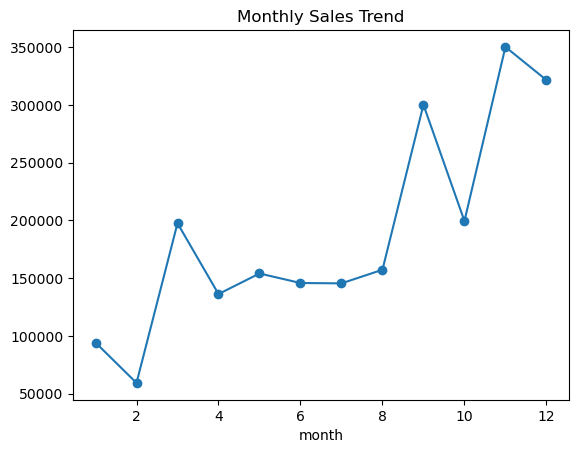

In [24]:
monthly_sales = df.groupby('month')['sales'].sum()

monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.show()


## Key Insights


- The West region generates the highest total sales, indicating a strong market presence in that region.
- Sales show a clear seasonal pattern, with noticeable peaks in November and December, likely driven by holiday demand.
- A small number of products contribute disproportionately to overall revenue, suggesting a classic Pareto (80/20) effect.
- Sales demonstrate an overall upward trend across years, indicating consistent business growth.
